# Trabajo Práctico 4
Para las imágenes suministradas:
1. Implementar un extractor de características LBP básico (sin uniformidad, 8 vecinos)
2. Realizar el histograma de características LBP de la imagen
3. Comparar los histogramas

In [119]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern
import pandas as pd
from os import listdir
from os.path import isfile, join

In [56]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline

[skimage implementation example](https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_local_binary_pattern.html)

______

In [57]:
def convert_gray(img_in):
    return cv.cvtColor(img_in, cv.COLOR_BGR2GRAY)

In [58]:
def convert_RGB(img_in):
    return cv.cvtColor(img_in, cv.COLOR_BGR2RGB)

In [59]:
def filter_image(img_in):
    return cv.GaussianBlur(img_in, ksize=(5, 5), sigmaX=0)

In [60]:
def lbp(img_in, num_points=8, radius=1, method='uniform'):
    return local_binary_pattern(img_in, num_points, radius, method)

In [61]:
def standarize_size(img_in:np.ndarray, dims=(255, 255)):
    if img_in.shape == dims:
        return img_in
    return cv.resize(img_in, dims, interpolation= cv.INTER_AREA)

In [70]:
def kullback_leibler_divergence(p, q):
    p = np.asarray(p)
    q = np.asarray(q)
    filt = np.logical_and(p != 0, q != 0)
    return np.sum(p[filt] * np.log2(p[filt] / q[filt]))

In [62]:
def plot_grid(img_names: list, imgs_in: list, cmap:str = None):
    n_columns = len(imgs_in)

    # Número de columnas en la imagen
    plot_columns = 3
    plot_rows = n_columns/plot_columns if n_columns%plot_columns == 0 else int(n_columns/plot_columns) + 1
    

    fig, ax = plt.subplots(plot_rows, plot_columns, figsize=(20,20))
    if ax.ndim == 1:
        ax = ax.reshape((plot_rows, plot_columns))

    for i, img in enumerate(imgs_in):
        row = int(i / plot_columns)
        col = i % plot_columns
        ax[row, col].imshow(img, cmap)
        ax[row, col].set_title(img_names[i])
        #ax[row, col].grid()

    plt.tight_layout()
    fig.show()

In [113]:
def plot_hist_grid(img_names: list, hist_list: list, range_width: int):
    n_columns = len(hist_list)

    # Número de columnas en la imagen
    plot_columns = 3
    plot_rows = n_columns/plot_columns if n_columns%plot_columns == 0 else int(n_columns/plot_columns) + 1
    

    fig, ax = plt.subplots(plot_rows, plot_columns, figsize=(20,20))
    if ax.ndim == 1:
        ax = ax.reshape((plot_rows, plot_columns))
    
    histo_dict = {}

    for i, hist in enumerate(hist_list):
        row = int(i / plot_columns)
        col = i % plot_columns

        name = img_names[i]

        print(name)
        histo_dict[name] = hist
        ax[row, col].bar(hist[1][:-1], hist[0], width=range_width)
        ax[row, col].set_title(name)
        ax[row, col].grid()

        

    plt.tight_layout()
    fig.show()

    return histo_dict

_____________________________________________________________________________

In [63]:
img_dir = './img'
img_files = [f for f in listdir(img_dir) if isfile(join(img_dir, f))]
img_files.sort(reverse=True)
print(len(img_files))
img_files

13


['rbt_scn4_focus.png',
 'rbt_scn4.png',
 'rbt_scn3_focus.png',
 'rbt_scn3.png',
 'rbt_scn2.png',
 'rbt_scn1_focus.png',
 'piedras2.png',
 'piedras1.png',
 'oveja2.png',
 'oveja1.png',
 'ladrillos2.png',
 'ladrillos1.png',
 'cielo.png']

In [64]:
imgs = [cv.imread(join(img_dir, f)) for f in img_files]
imgs = [convert_gray(img) for img in imgs]
imgs = [filter_image(img) for img in imgs]
#imgs = [standarize_size(img) for img in imgs]

/Users/ext_asalassa/.pyenv/versions/3.7.11/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


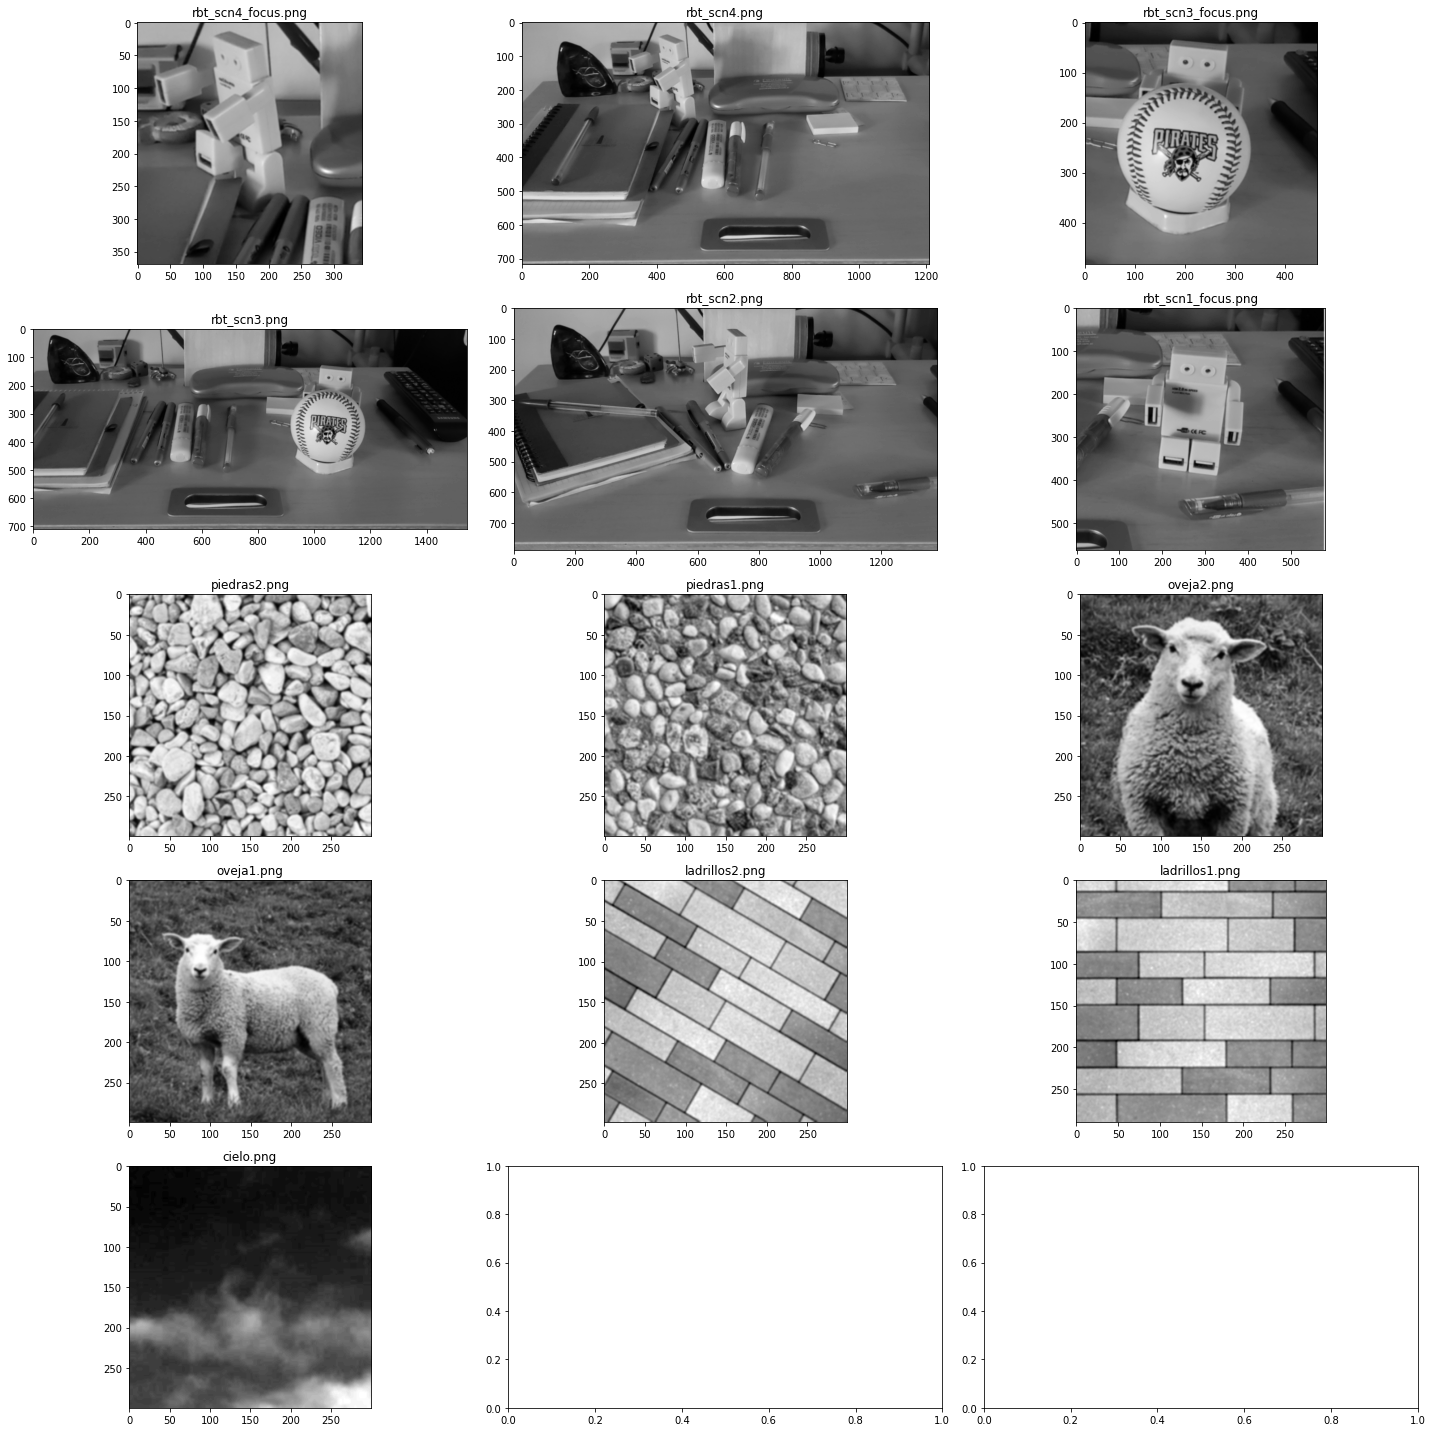

In [66]:
plot_grid(img_names=img_files, imgs_in=imgs, cmap='gray')

In [67]:
imgs_lbp_uniform = [lbp(img, num_points=8, radius=1, method='uniform') for img in imgs]
imgs_lbp_default = [lbp(img, num_points=8, radius=1, method='default') for img in imgs]

/Users/ext_asalassa/.pyenv/versions/3.7.11/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


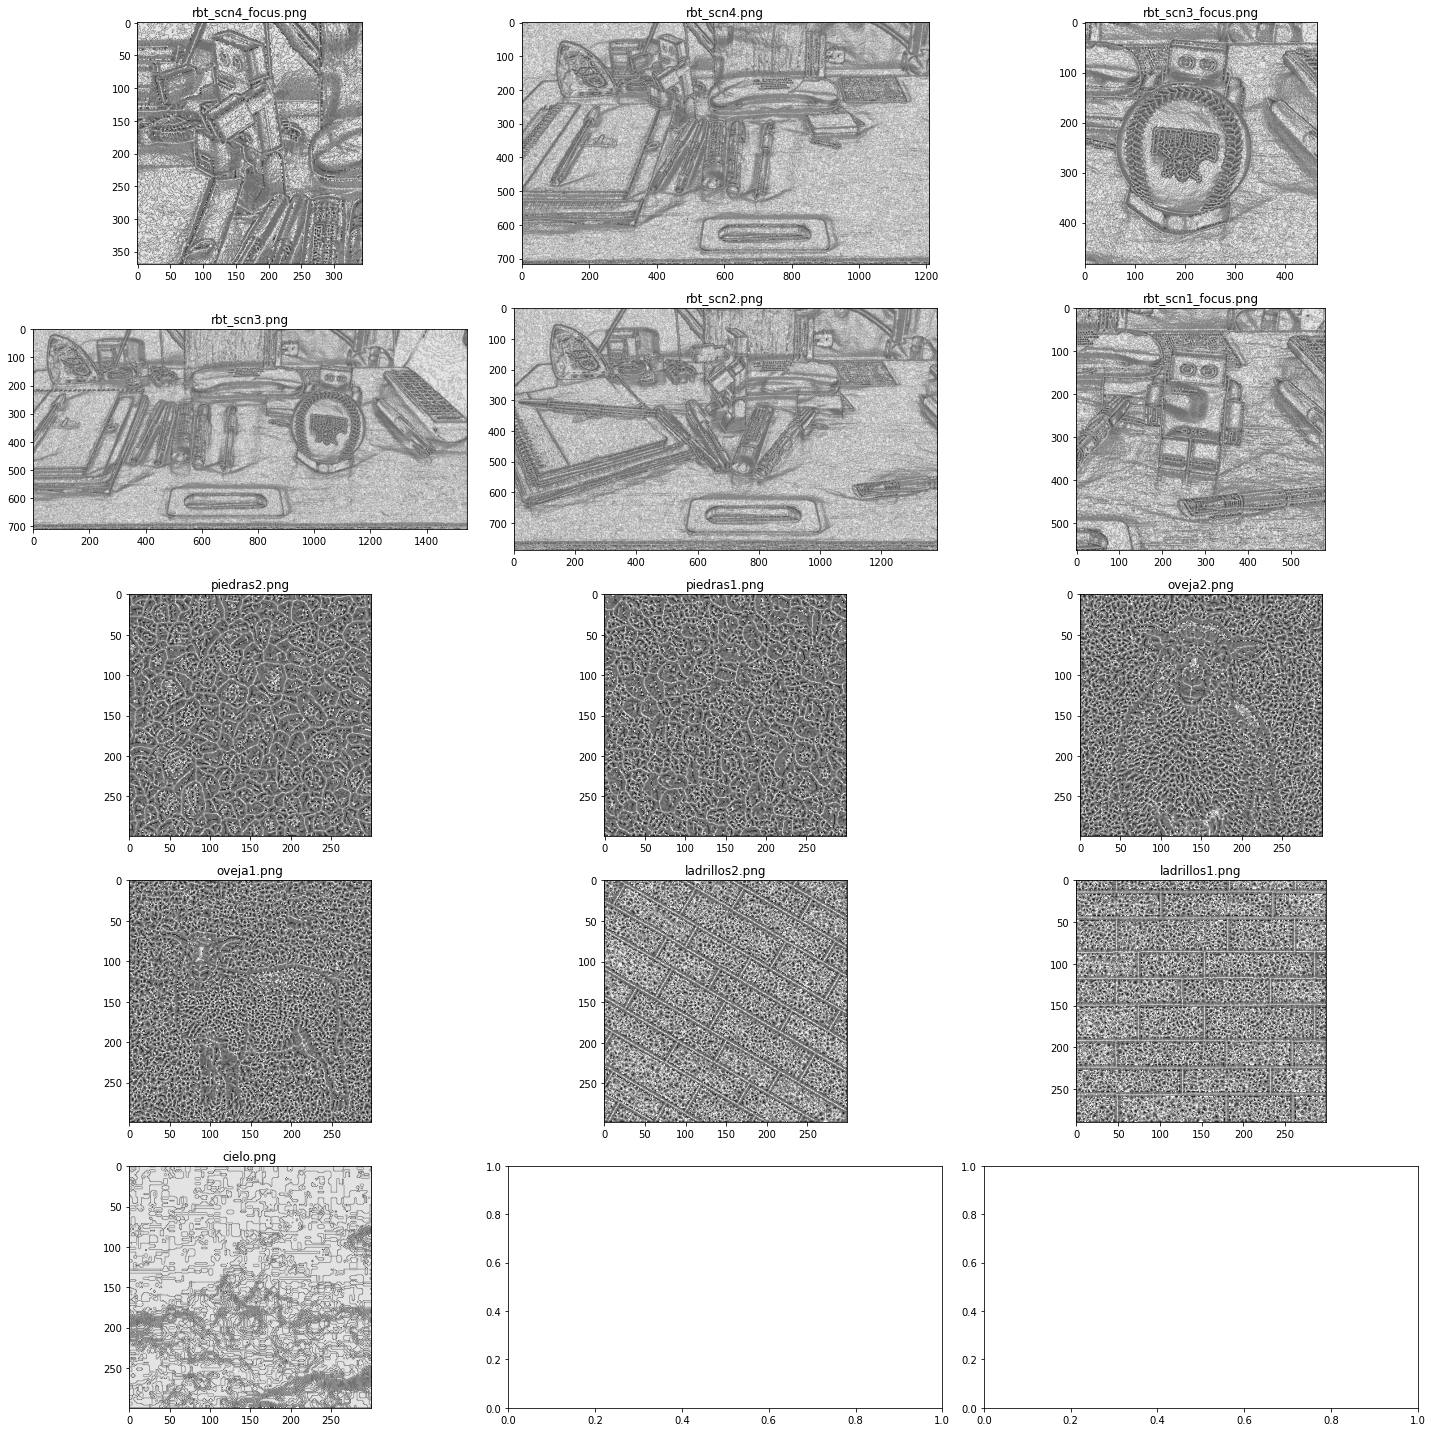

In [68]:
plot_grid(img_names=img_files, imgs_in=imgs_lbp_uniform, cmap='gray')

/Users/ext_asalassa/.pyenv/versions/3.7.11/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


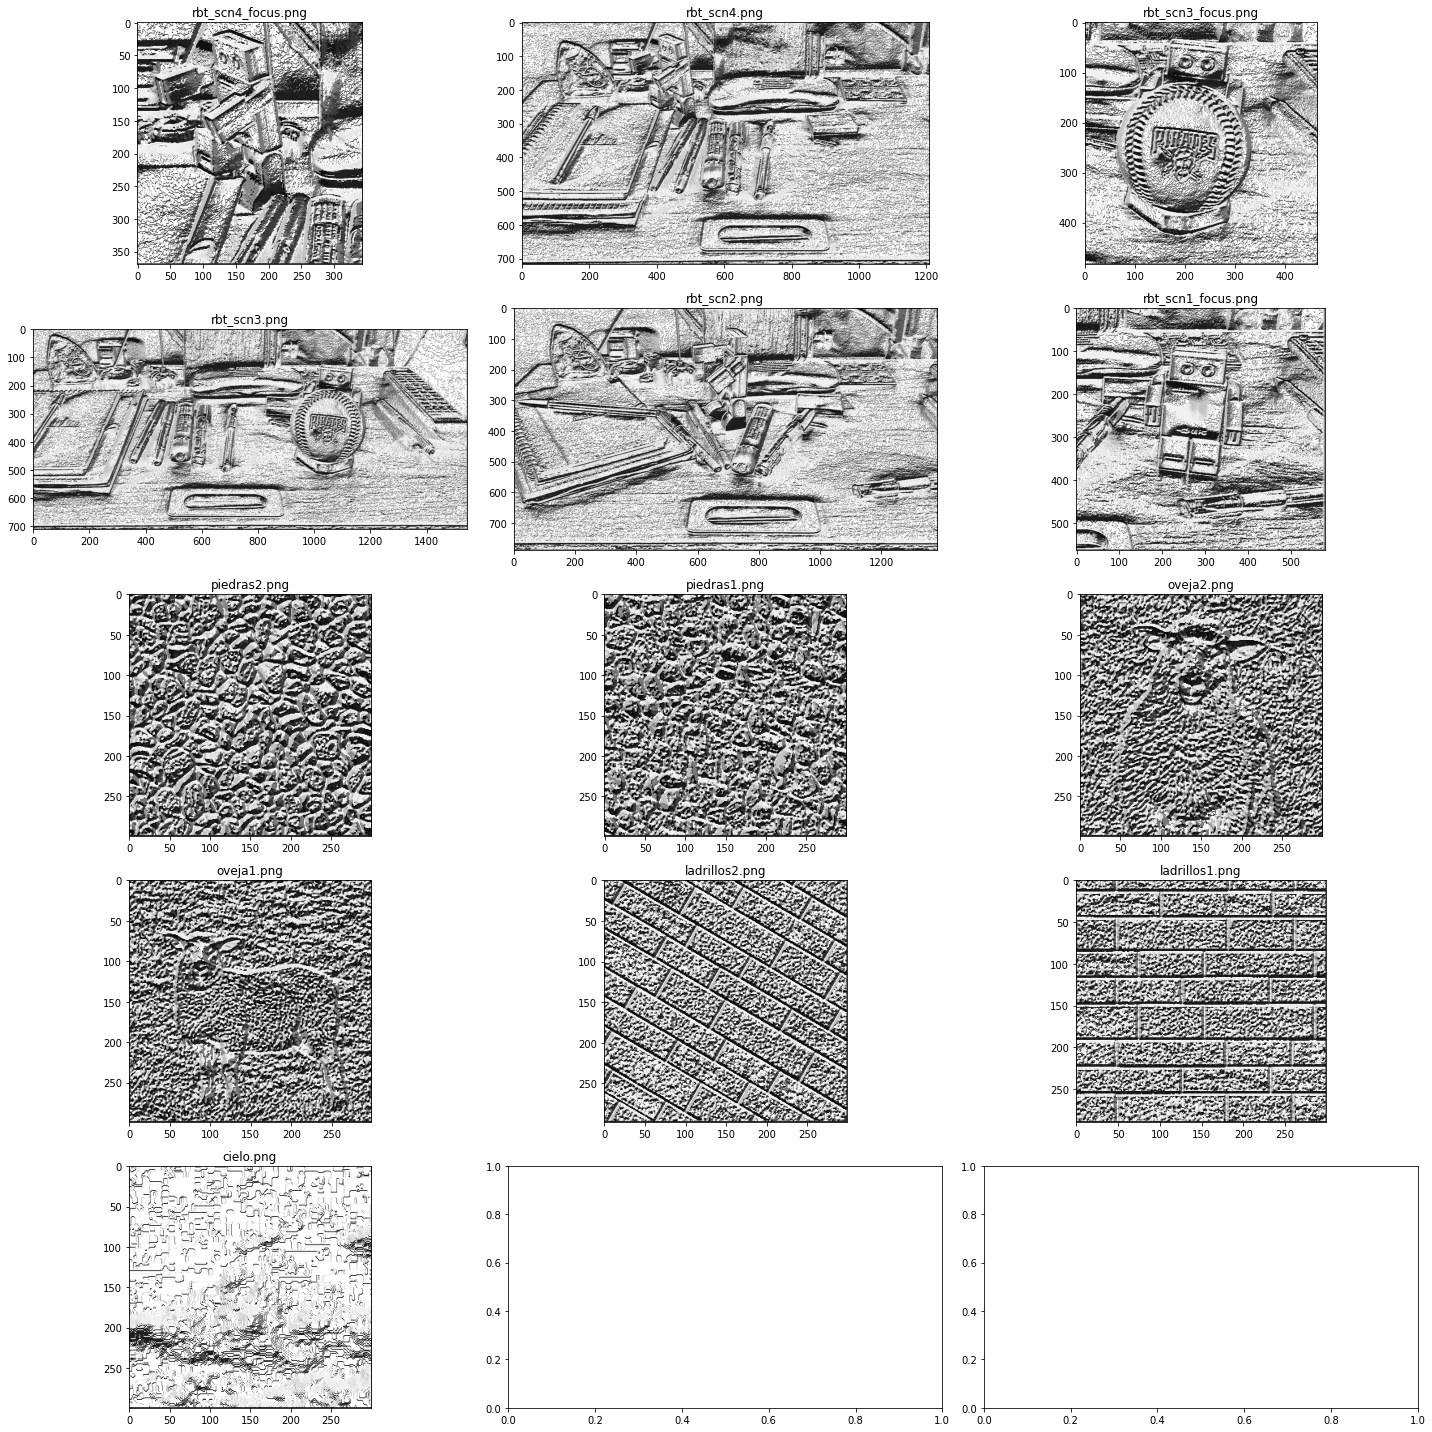

In [69]:
plot_grid(img_names=img_files, imgs_in=imgs_lbp_default, cmap='gray')

In [97]:
bin_range = 5
bins = [bin_range * i for i in range(int(255 / bin_range) + 1)]
lbp_hists = [np.histogram(img, density=True, bins=bins) for img in imgs_lbp_default]

rbt_scn4_focus.png
rbt_scn4.png
rbt_scn3_focus.png
rbt_scn3.png
rbt_scn2.png
rbt_scn1_focus.png
piedras2.png
piedras1.png
oveja2.png
oveja1.png
ladrillos2.png
ladrillos1.png
cielo.png


/Users/ext_asalassa/.pyenv/versions/3.7.11/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


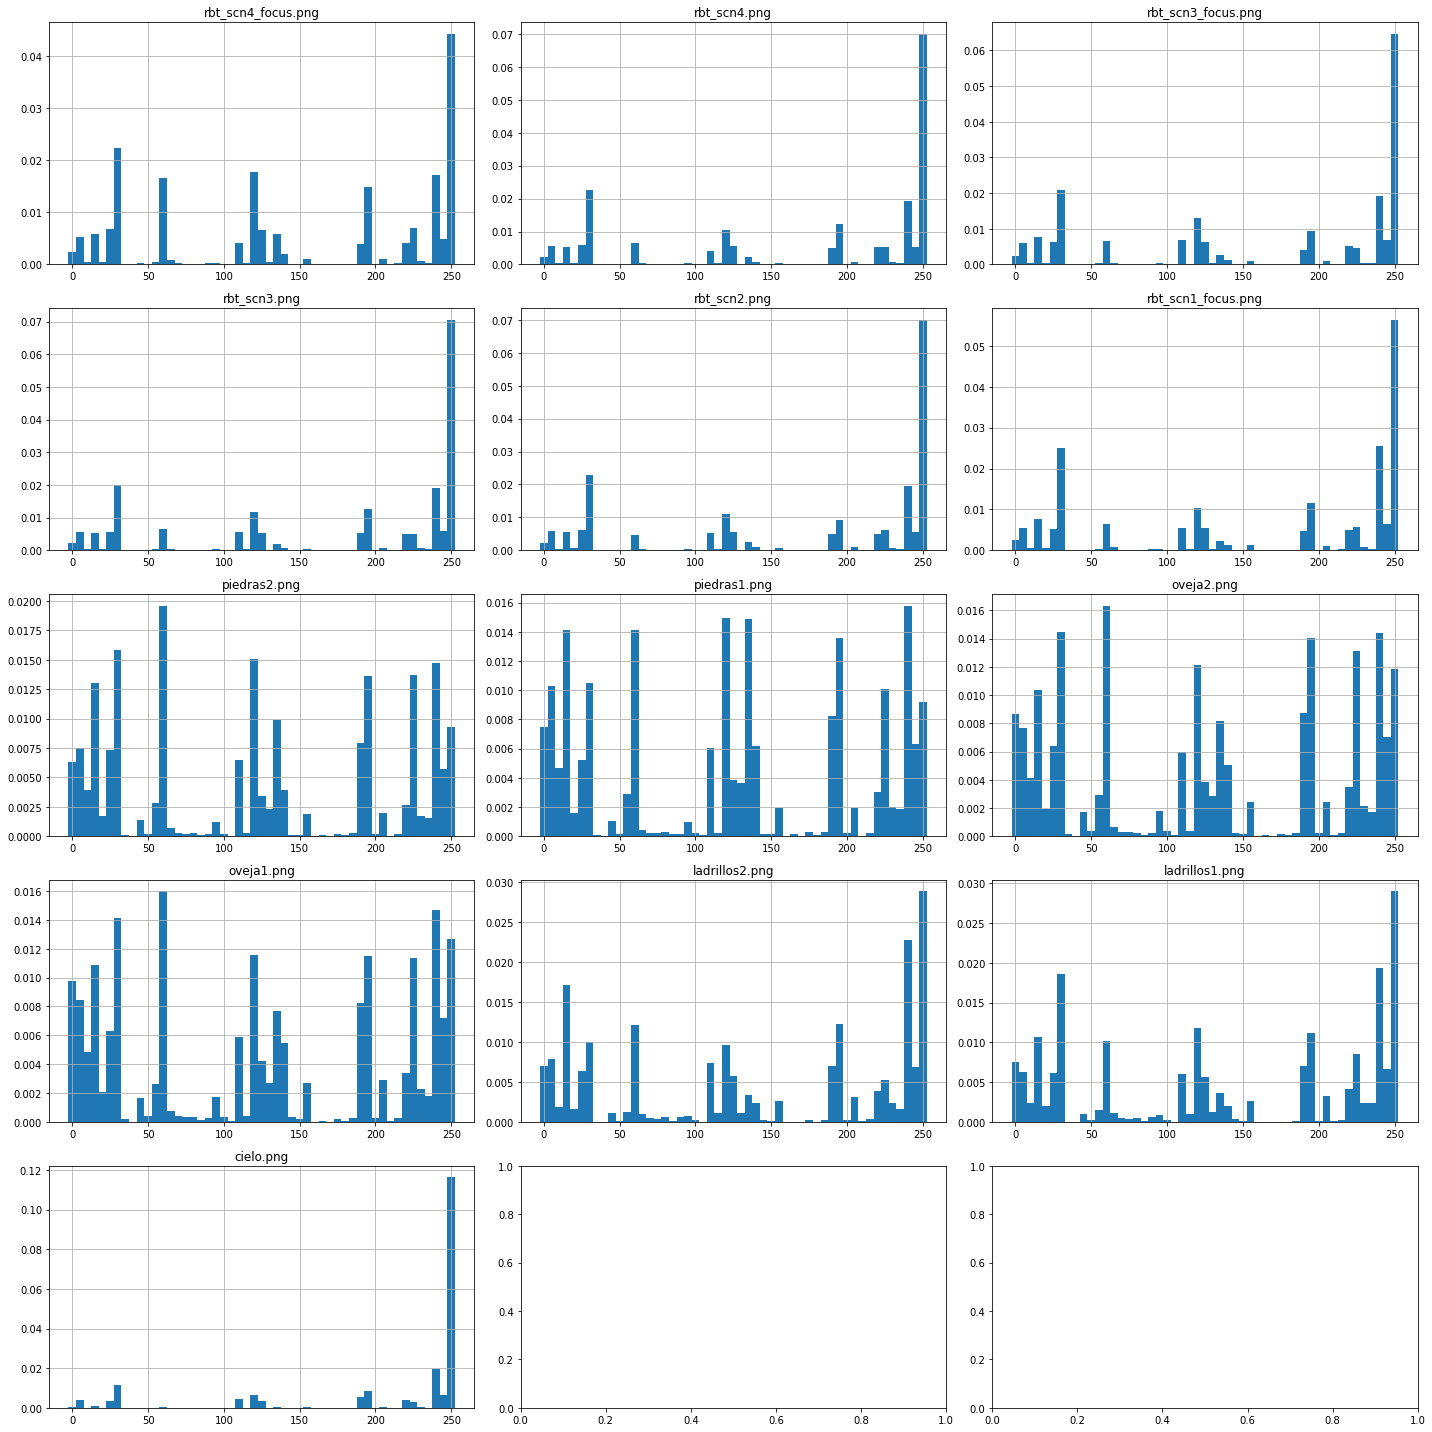

In [114]:
histo_dict = plot_hist_grid(img_names=img_files, hist_list=lbp_hists, range_width=bin_range)

In [117]:
score_table = []

for name, hist in histo_dict.items():
    score = float('inf')
    row_score_table = []
    match_name = None
    for name_comp, hist_comp in histo_dict.items():
        if name != name_comp:
            kull_score = kullback_leibler_divergence(hist[0], hist_comp[0])
            if score > kull_score:
                match_name = name_comp
                score = kull_score
            row_score_table.append(kull_score)
        else:
            row_score_table.append(0)
    score_table.append(row_score_table)
    print(f"{name} -> closer to: {match_name}")


rbt_scn4_focus.png -> closer to: rbt_scn1_focus.png
rbt_scn4.png -> closer to: rbt_scn3.png
rbt_scn3_focus.png -> closer to: rbt_scn2.png
rbt_scn3.png -> closer to: rbt_scn4.png
rbt_scn2.png -> closer to: rbt_scn4.png
rbt_scn1_focus.png -> closer to: rbt_scn3_focus.png
piedras2.png -> closer to: oveja2.png
piedras1.png -> closer to: piedras2.png
oveja2.png -> closer to: oveja1.png
oveja1.png -> closer to: oveja2.png
ladrillos2.png -> closer to: ladrillos1.png
ladrillos1.png -> closer to: ladrillos2.png
cielo.png -> closer to: rbt_scn3.png


In [122]:
scores_df = pd.DataFrame(score_table, columns=img_files, index=img_files)
scores_df

rbt_scn4_focus.png  rbt_scn4.png  rbt_scn3_focus.png  \
rbt_scn4_focus.png            0.000000      0.026107            0.022476   
rbt_scn4.png                  0.023186      0.000000            0.004526   
rbt_scn3_focus.png            0.020076      0.004896            0.000000   
rbt_scn3.png                  0.023224      0.000776            0.003507   
rbt_scn2.png                  0.026331      0.001690            0.003166   
rbt_scn1_focus.png            0.018424      0.005883            0.004781   
piedras2.png                  0.073570      0.147804            0.125368   
piedras1.png                  0.095556      0.173620            0.144196   
oveja2.png                    0.080052      0.146618            0.124216   
oveja1.png                    0.085080      0.149884            0.124821   
ladrillos2.png                0.053545      0.080679            0.061527   
ladrillos1.png                0.040679      0.067625            0.053678   
cielo.png                     0.122553      0.048926            0.061086   

                    rbt_scn3.png  rbt_scn2.png  rbt_scn1_focus.png  \
rbt_scn4_focus.png      0.025733      0.031384            0.021485   
rbt_scn4.png            0.000761      0.001775            0.005608   
rbt_scn3_focus.png      0.003635      0.003346            0.004638   
rbt_scn3.png            0.000000      0.002353            0.006269   
rbt_scn2.png            0.002239      0.000000            0.005580   
rbt_scn1_focus.png      0.006526      0.005771            0.000000   
piedras2.png            0.144529      0.147351            0.119149   
piedras1.png            0.168881      0.167761            0.140327   
oveja2.png              0.143100      0.144904            0.117331   
oveja1.png              0.146302      0.146906            0.118908   
ladrillos2.png          0.076929      0.080160            0.056366   
ladrillos1.png          0.066268      0.065585            0.046450   
cielo.png               0.046814      0.048529            0.073822   

                    piedras2.png  piedras1.png  oveja2.png  oveja1.png  \
rbt_scn4_focus.png      0.081213      0.097353    0.075982    0.076446   
rbt_scn4.png            0.171446      0.184943    0.151488    0.147648   
rbt_scn3_focus.png      0.149579      0.160453    0.132427    0.127671   
rbt_scn3.png            0.170495      0.182292    0.150431    0.146646   
rbt_scn2.png            0.171545      0.184000    0.151616    0.146938   
rbt_scn1_focus.png      0.131244      0.144375    0.116457    0.113187   
piedras2.png            0.000000      0.008441    0.004402    0.007331   
piedras1.png            0.008392      0.000000    0.009291    0.010228   
oveja2.png              0.004549      0.008895    0.000000    0.001330   
oveja1.png              0.007780      0.009851    0.001338    0.000000   
ladrillos2.png          0.046146      0.047269    0.036783    0.031758   
ladrillos1.png          0.039534      0.047710    0.028793    0.025311   
cielo.png               0.384365      0.389990    0.344065    0.334841   

                    ladrillos2.png  ladrillos1.png  cielo.png  
rbt_scn4_focus.png        0.046229        0.032354   0.172062  
rbt_scn4.png              0.072099        0.058592   0.063190  
rbt_scn3_focus.png        0.057133        0.047328   0.079676  
rbt_scn3.png              0.068822        0.058229   0.060228  
rbt_scn2.png              0.072403        0.057790   0.061458  
rbt_scn1_focus.png        0.051166        0.038669   0.091107  
piedras2.png              0.044162        0.036018   0.353884  
piedras1.png              0.049235        0.048309   0.380028  
oveja2.png                0.036508        0.027690   0.328577  
oveja1.png                0.032033        0.025237   0.326556  
ladrillos2.png            0.000000        0.009744   0.235116  
ladrillos1.png            0.010209        0.000000   0.206694  
cielo.png                 0.192679        0.187263   0.000000